In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

from wordcloud import WordCloud

from crossref import calc_word_occurrence_in_dir

from fastprogress.fastprogress import progress_bar

Stop Words: https://countwordsfree.com/stopwords

In [2]:
with open("/home/wasserstoff/Downloads/stop_words_english.txt", "r") as file:
    stop_words = file.read().split("\n") 

In [3]:
def filter_stop_word(word_occurrence: dict):
    for word in progress_bar(stop_words):
        word_occurrence.pop(word, None)

In [50]:
def plot_world_cloud(words, save_path: str):
    wordcloud = WordCloud(width=1080, height=720, background_color=None, mode = "RGBA", colormap="viridis").generate_from_frequencies(frequencies=words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, transparent=True)
    plt.show()

# Title

In [6]:
title_words = calc_word_occurrence_in_dir("/run/media/wasserstoff/Fedora Linux New/torrent/w_type_sync", "title", True)

In [7]:
filter_stop_word(title_words)

In [8]:
dict(sorted(title_words.items(), key=lambda item: item[1], reverse=True))

{'study': 378173,
 'analysis': 321279,
 'patients': 235405,
 'effects': 215190,
 'human': 185165,
 'cells': 164392,
 'cell': 160184,
 'cancer': 159944,
 'based': 155655,
 'development': 153708,
 'model': 142215,
 'treatment': 133725,
 'role': 130532,
 'review': 130279,
 'evaluation': 129250,
 'performance': 124723,
 'activity': 124689,
 'properties': 114640,
 'impact': 113416,
 'health': 112726,
 'case': 112030,
 'protein': 110710,
 'disease': 106934,
 'method': 101542,
 'risk': 97071,
 'growth': 96243,
 'clinical': 96014,
 'influence': 94814,
 'approach': 94448,
 'expression': 94173,
 'response': 92586,
 'management': 92351,
 'high': 90589,
 'application': 89828,
 'assessment': 88260,
 'control': 87986,
 'factors': 87983,
 'synthesis': 86387,
 'characterization': 85609,
 'social': 83210,
 'quality': 83009,
 'gene': 78823,
 'comparison': 78118,
 'therapy': 77748,
 'detection': 77179,
 'water': 75673,
 'production': 75406,
 'data': 75035,
 'acid': 73567,
 'type': 73054,
 'evidence': 727

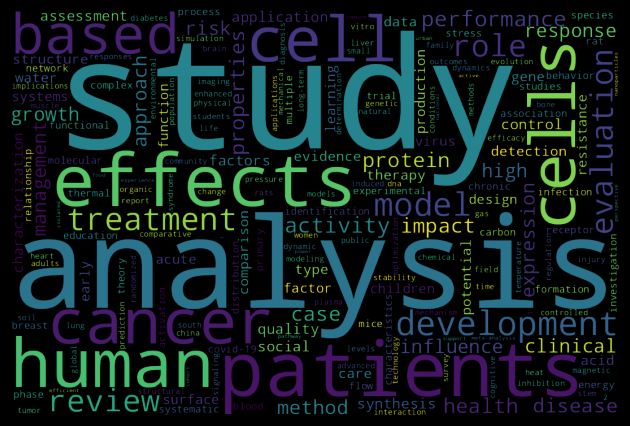

In [51]:
plot_world_cloud(title_words, "../presentation/word_clouds/title.png")

# Publisher Names (Split)

In [22]:
publisher_words = calc_word_occurrence_in_dir("/run/media/wasserstoff/Fedora Linux New/torrent/w_type_sync", "container_title", True)

In [26]:
filter_stop_word(publisher_words)

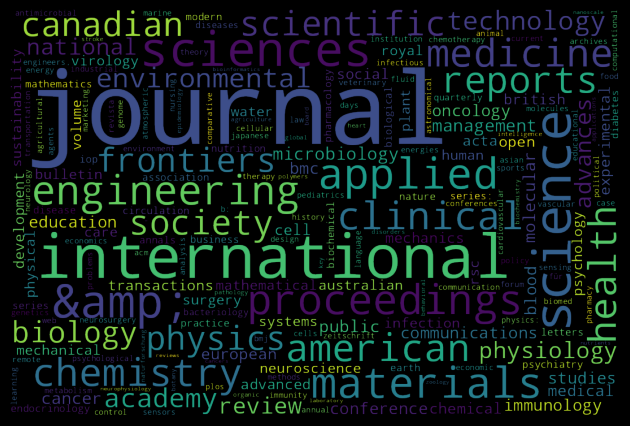

In [52]:
plot_world_cloud(publisher_words, "../presentation/word_clouds/publisher_split.png")

# Publisher Names (Whole)

In [23]:
publisher_words_whole = calc_word_occurrence_in_dir("/run/media/wasserstoff/Fedora Linux New/torrent/w_type_sync", "container_title", False)

In [28]:
filter_stop_word(publisher_words_whole)

In [29]:
dict(sorted(publisher_words_whole.items(), key=lambda item: item[1], reverse=True))

{'scientific reports': 120204,
 'proceedings of the national academy of sciences': 96906,
 'blood': 66857,
 'the journal of immunology': 45323,
 'rsc advances': 43914,
 'journal of clinical oncology': 40345,
 'journal of virology': 39336,
 'sustainability': 38825,
 'advanced materials research': 37394,
 'international journal of environmental research and public health': 34852,
 'international journal of molecular sciences': 33509,
 'biochemical journal': 32486,
 'journal of bacteriology': 31196,
 'all days': 29222,
 'nature communications': 28242,
 'cancer research': 27883,
 'japanese journal of applied physics': 26934,
 'applied and environmental microbiology': 26885,
 'applied sciences': 25492,
 'applied mechanics and materials': 25458,
 'infection and immunity': 25079,
 'the journal of neuroscience': 23918,
 'antimicrobial agents and chemotherapy': 23691,
 'journal of clinical microbiology': 23484,
 'circulation': 22797,
 'mrs proceedings': 22059,
 'molecules': 21956,
 'energies': 

# Abstract

In [24]:
abstract_words = calc_word_occurrence_in_dir("/run/media/wasserstoff/Fedora Linux New/torrent/w_type_sync", "abstract", True)

In [30]:
filter_stop_word(abstract_words)

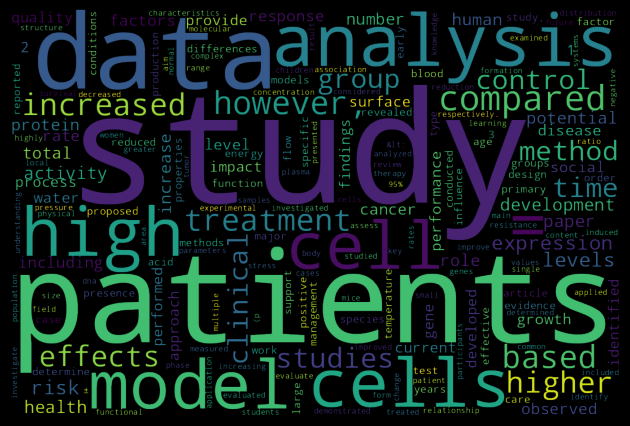

In [53]:
plot_world_cloud(abstract_words, "../presentation/word_clouds/abstract.png")

In [55]:
types = calc_word_occurrence_in_dir("/run/media/wasserstoff/Fedora Linux New/torrent/w_type_sync", "type", False)

In [3]:
types

{'proceedings-article': 99579,
 'book': 2736,
 'monograph': 67,
 'edited-book': 2,
 'report-series': 350,
 'book-section': 2,
 'reference-entry': 2343,
 'journal-article': 6381512,
 'book-chapter': 32039,
 'other': 23,
 'book-part': 5,
 'report': 15}

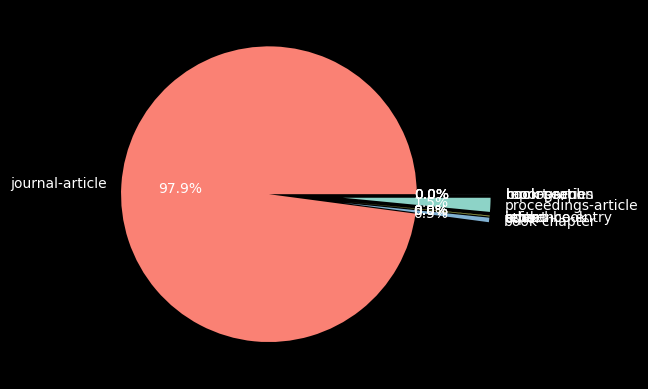

In [57]:
import matplotlib.pyplot as plt

total = sum(list(types.values()))
percent = np.array(list(types.values()))/total * 100
explode = tuple([0.0 if x > 10.0 else 0.5 for x in percent])

plt.pie(percent, labels=list(types.keys()), autopct='%1.1f%%', explode=explode)
plt.show()

<BarContainer object of 12 artists>

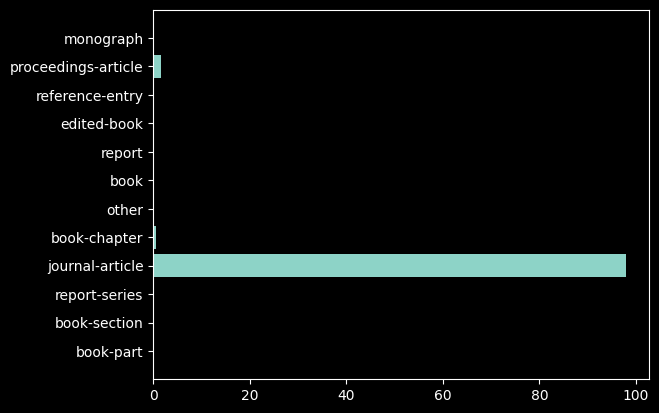

In [59]:
plt.barh(list(types.keys()), percent)